<a href="https://colab.research.google.com/github/manik0493/Google-Colab-CNN-Face-Recogonition/blob/master/CNN_Assignment_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import keras
import functools
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os


In [0]:
import pandas as pd
import s3fs

df = pd.read_csv('https://lab0493.s3.us-east-2.amazonaws.com/fer2013.csv')


In [0]:
def extract_data(df):
  Y=[]
  X=[]
  for index,row in df.iterrows():
    Y.append(int(row['emotion']))
    X.append([int(p) for p in row['pixels'].split()])
  X,Y = np.array(X)/255.0,np.array(Y)
  return X,Y
X,Y = extract_data(df)

  


In [0]:
labels = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

In [0]:
N,D = X.shape
X = X.reshape(N,48,48,1)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)


In [0]:
batch_size = 128
num_classes = len(set(Y))
epochs = 100
data_augmentation = True
num_predictions = 25

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Flattening
model.add(Flatten())
  # Fully connected layer 1st layer
model.add(Dense(256))

model.add(Activation('relu'))
model.add(Dropout(0.25))
# Fully connected layer 2nd layer
model.add(Dense(512))

model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['categorical_accuracy'])

In [0]:
history=model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           validation_data=(x_test, y_test),
           shuffle=True)

Train on 32298 samples, validate on 3589 samples
Epoch 1/100
32298/32298 [==============================] - 132s 4ms/step - loss: 0.3968 - categorical_accuracy: 0.2383 - val_loss: 0.3965 - val_categorical_accuracy: 0.2636
Epoch 2/100
32298/32298 [==============================] - 132s 4ms/step - loss: 0.3795 - categorical_accuracy: 0.2842 - val_loss: 0.3477 - val_categorical_accuracy: 0.3870
Epoch 3/100
32298/32298 [==============================] - 131s 4ms/step - loss: 0.3407 - categorical_accuracy: 0.3948 - val_loss: 0.3138 - val_categorical_accuracy: 0.4525
Epoch 4/100
32298/32298 [==============================] - 131s 4ms/step - loss: 0.3137 - categorical_accuracy: 0.4553 - val_loss: 0.2968 - val_categorical_accuracy: 0.4923
Epoch 5/100
32298/32298 [==============================] - 131s 4ms/step - loss: 0.2968 - categorical_accuracy: 0.4895 - val_loss: 0.2763 - val_categorical_accuracy: 0.5358
Epoch 6/100
32298/32298 [==============================] - 132s 4ms/step - loss: 0.284

In [0]:
scores = model.evaluate(x_test, y_test, verbose=1)


3589/3589 [==============================] - 3s 827us/step


In [0]:
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.3193445472572467
Test accuracy: 0.632488158269658


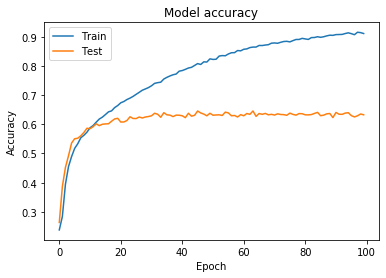

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

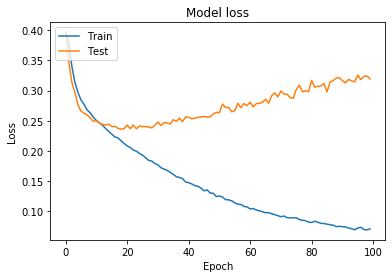

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
predicted_y=model.predict(x_test[:25])
predicted_y=np.argmax(predicted_y,axis=-1)
y_test_true = np.argmax(y_test,axis=-1)
for i in range(25):
  print("TestCase Number #"+str(i+1))
  print("------------------------------")
  print("True Label: "+labels[y_test_true[i]])
  print("Predicted Label: "+labels[predicted_y[i]])
  print(" ")

TestCase Number #1
------------------------------
True Label: Happy
Predicted Label: Happy
 
TestCase Number #2
------------------------------
True Label: Sad
Predicted Label: Sad
 
TestCase Number #3
------------------------------
True Label: Fear
Predicted Label: Surprise
 
TestCase Number #4
------------------------------
True Label: Sad
Predicted Label: Sad
 
TestCase Number #5
------------------------------
True Label: Anger
Predicted Label: Anger
 
TestCase Number #6
------------------------------
True Label: Neutral
Predicted Label: Neutral
 
TestCase Number #7
------------------------------
True Label: Happy
Predicted Label: Happy
 
TestCase Number #8
------------------------------
True Label: Neutral
Predicted Label: Happy
 
TestCase Number #9
------------------------------
True Label: Fear
Predicted Label: Surprise
 
TestCase Number #10
------------------------------
True Label: Neutral
Predicted Label: Neutral
 
TestCase Number #11
------------------------------
True Label: 